In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



consumer_key = "yH0lITNze2ILNdqmccHCXLwN7"
consumer_secret = "hkYmavoSlKaRiC8pvKDzZcEHUjteeqOEEDqqzbQ2ZYwL8QxVcM"
access_token = "31018537-vrilODbUnAPr3VnAUQIocHn1BDiK8tvHHs7kKXz6Q"
access_token_secret = "SVxnVFVEajrqmS91DobG3HXuJrhqfU1Cs0GdT7qMQZG1P"


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:

sources = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]


data = {"source": [],"content": [], "date": [],"vader_score": [],"neutral_score": [],
    "positive_score": [],"negative_score": []}

for x in range(5):

    for source in sources:

        tweets = api.user_timeline(source, page=x)
        for tweet in tweets:
            
            data["source"].append(tweet["user"]["name"])
            data["content"].append(tweet["text"])
            data["date"].append(tweet["created_at"])
            data["vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            data["neutral_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            data["positive_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            data["negative_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

df_twitter = pd.DataFrame(data, columns=["source", "content", "date","vader_score",
"neutral_score","positive_score","negative_score"])

df_twitter

,source,content,date,vader_score,neutral_score,positive_score,negative_score
0,Fox News,BREAKING: Federal appeals court rules against ...,Thu Nov 08 19:18:44 +0000 2018,0.0000,1.000,0.000,0.000
1,Fox News,Breaking News: Grand jury indicts captain of M...,Thu Nov 08 17:02:25 +0000 2018,-0.6124,0.615,0.115,0.269
2,Fox News,JUST IN: Police identify gunman who opened fir...,Thu Nov 08 15:14:45 +0000 2018,-0.7783,0.638,0.000,0.362
3,Fox News,JUST IN: Supreme Court Justice Ruth Bader Gins...,Thu Nov 08 14:22:51 +0000 2018,0.7906,0.611,0.389,0.000
4,Fox News,Sgt. Ron Helus was fatally shot when he respon...,Thu Nov 08 13:43:25 +0000 2018,-0.6369,0.833,0.000,0.167
5,Fox News,Tom Homan: “It’s a tragedy each and every time...,Thu Nov 08 13:35:03 +0000 2018,-0.6597,0.672,0.000,0.328
6,Fox News,People walk away from the scene in Thousand Oa...,Thu Nov 08 13:22:27 +0000 2018,-0.3400,0.862,0.000,0.138
7,Fox News,Teylor Whittler describes what she witnessed a...,Thu Nov 08 12:56:20 +0000 2018,0.0000,1.000,0.000,0.000
8,Fox News,An FBI agent talks to a potential witness as t...,Thu Nov 08 12:37:05 +0000 2018,0.0000,1.000,0.000,0.000
9,Fox News,Ventura County Fire Department Captain Stan Zi...,Thu Nov 08 12:25:14 +0000 2018,-0.3400,0.870,0.000,0.130


In [3]:
df_twitter.count()

source            500
content           500
date              500
vader_score       500
neutral_score     500
positive_score    500
negative_score    500
dtype: int64

In [4]:
df_twitter["date"] = pd.to_datetime(df_twitter["date"])

df_twitter.sort_values("date")

df_twitter.source.unique()


array(['Fox News', 'CNN', 'BBC News (World)', 'CBS News',
       'The New York Times'], dtype=object)

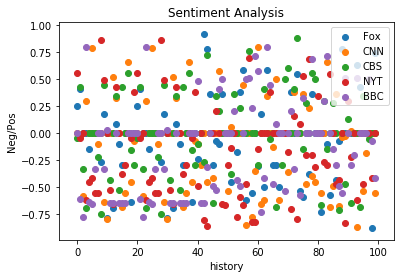

In [5]:
BBC_df=df_twitter.loc[df_twitter["source"]=="Fox News",:].reset_index(drop=True)
CBS_df=df_twitter.loc[df_twitter["source"]=="CNN",:].reset_index(drop=True)
CNN_df=df_twitter.loc[df_twitter["source"]=="CBS News",:].reset_index(drop=True)
FoxNews_df=df_twitter.loc[df_twitter["source"]=="The New York Times",:].reset_index(drop=True)
nytimes_df=df_twitter.loc[df_twitter["source"]=="BBC News (World)",:].reset_index(drop=True)

plt.scatter(FoxNews_df.index,FoxNews_df["vader_score"],label="Fox")
plt.scatter(CNN_df.index,CNN_df["vader_score"],label="CNN")
plt.scatter(CBS_df.index,CBS_df["vader_score"],label="CBS")
plt.scatter(nytimes_df.index,nytimes_df["vader_score"],label="NYT")
plt.scatter(BBC_df.index,BBC_df["vader_score"],label="BBC")


plt.title("Sentiment Analysis")
plt.ylabel("Neg/Pos")
plt.xlabel("history")
plt.legend(loc="best")
plt.savefig("party_sprinkles.png")
plt.show()


In [6]:
list_of_score = df_twitter.groupby(["source"]).mean()["vader_score"]
list_of_score

source
BBC News (World)     -0.145907
CBS News             -0.102404
CNN                  -0.011822
Fox News             -0.116200
The New York Times   -0.048684
Name: vader_score, dtype: float64

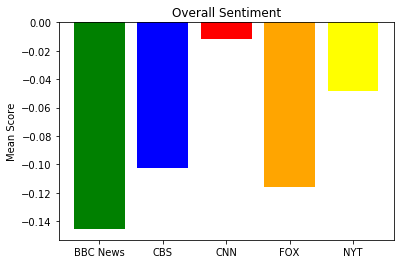

In [7]:

plt.bar("BBC News",height=list_of_score[0],color='green')
plt.bar("CBS",height=list_of_score[1],color='blue')
plt.bar("CNN",height=list_of_score[2],color='red')
plt.bar("FOX",height=list_of_score[3],color='orange')
plt.bar("NYT",height=list_of_score[4],color='yellow')


plt.title("Overall Sentiment")
plt.ylabel("Mean Score")
plt.savefig("bar_graph.png")
plt.show()

In [8]:
df_twitter.to_csv('tweet.csv')